Devoir d'IN304 fait par Lucas Auclair 22102239 LDDBI

Tout d'abord importons les bibliothèques re et pandas afin de pouvoir commencer à mettre en place les opérations d'analyse et de modélisation de données dont nous aurons besoin pour répondre à la problématique du sujet.

In [57]:
import re
import pandas as pd

On modélise en tant que DataFrame le fichier avec pandas et on regarde rapidement à quoi ressemblent les données afin d'avoir un ordre d'idées de comment nous pouvons traiter les données pour les mettre en valeur avant de les analyser par la suite.

In [58]:
df = pd.read_json("versailles_tweets_100.json")
df

,_id,public_metrics,id,conversation_id,author_id,text,geo,lang,created_at,entities,context_annotations,attachments
0,1421616335700824064,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421616335700824064,1421616335700824064,1339914264522461184,Goumin des éléphants joueurs la même fatigue m...,{'place_id': '00b8943291443c8c'},fr,2021-07-31 23:38:41+00:00,"{'hashtags': [{'start': 52, 'end': 63, 'tag': ...",NaN,NaN
1,1421599703116943360,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421599703116943360,1421599703116943360,1339914264522461184,@ericbailly24 @maxigr04del mes tontons vous a...,{'place_id': '00b8943291443c8c'},fr,2021-07-31 22:32:35+00:00,"{'mentions': [{'start': 0, 'end': 13, 'usernam...","[{'domain': {'id': '6', 'name': 'Sports Event'...",NaN
2,1421599163561742336,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",1421599163561742336,1421599163561742336,1339914264522461184,Ah oui le sommeil là sera compliqué. #CIV est...,{'place_id': '00b8943291443c8c'},fr,2021-07-31 22:30:27+00:00,"{'hashtags': [{'start': 37, 'end': 41, 'tag': ...","[{'domain': {'id': '6', 'name': 'Sports Event'...",NaN
3,1421591889095057408,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421591889095057408,1421591889095057408,1339914264522461184,"31 juillet , journée internationale de la femm...",{'place_id': '00b8943291443c8c'},fr,2021-07-31 22:01:32+00:00,"{'hashtags': [{'start': 60, 'end': 65, 'tag': ...",NaN,NaN
4,1421582795294617600,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421582795294617600,1421582795294617600,717025418,Le pedigree 😂😂😂😂 https://t.co/D3Rv7A2BOF,{'place_id': '00b8943291443c8c'},es,2021-07-31 21:25:24+00:00,"{'urls': [{'start': 17, 'end': 40, 'url': 'htt...",NaN,NaN
5,1421581383454052352,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",1421581383454052352,1421256177359466496,992904738516717568,@isabelle170516 @leonna_julie @Steiner2502 Vou...,{'place_id': '011a304d683c2461'},fr,2021-07-31 21:19:48+00:00,"{'mentions': [{'start': 0, 'end': 15, 'usernam...",NaN,NaN
6,1421575939700445184,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421575939700445184,1421256177359466496,992904738516717568,@LynLyna12 @leonna_julie La grande muette cont...,{'place_id': '011a304d683c2461'},fr,2021-07-31 20:58:10+00:00,"{'mentions': [{'start': 0, 'end': 10, 'usernam...",NaN,NaN
7,1421569996858269696,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421569996858269696,1421569996858269696,736523371,Under wsh 😳😳😳,{'place_id': '011a304d683c2461'},en,2021-07-31 20:34:33+00:00,NaN,NaN,NaN
8,1421563798503272448,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421563798503272448,1421563798503272448,1471684208,Les bains d'apollon #versailles #nocturne #app...,"{'place_id': '011a304d683c2461', 'coordinates'...",fr,2021-07-31 20:09:55+00:00,"{'urls': [{'start': 76, 'end': 99, 'url': 'htt...",NaN,NaN
9,1421562928176803840,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",1421562928176803840,1421553997811421184,992904738516717568,@leonna_julie Le rdv aujourd'hui aura tenu se...,{'place_id': '011a304d683c2461'},fr,2021-07-31 20:06:28+00:00,"{'mentions': [{'start': 0, 'end': 13, 'usernam...",NaN,{'media_keys': ['3_1421562925999869960']}


On enlève les émojis, les caractères spéciaux et les URLS mais pas les hashtags et les @.
Puis on vérifie que le traitement de données voulu s'est bien réalisé.

In [59]:
df['text'] = df['text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', flags=re.UNICODE)
df
#Remove URLs in Python Pandas Dataframe(Dataset)
#('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
#from https://www.youtube.com/watch?v=GyV9qNvJFTE

#Remove special characters in Python Pandas Dataframe(Dataset)
#[^\w\s#@/:%.,_-] from https://stackoverflow.com/questions/47464658/python-efficient-way-to-remove-emojis-and-some-punctuation-from-a-large-dataset

C:\Users\lpvay\AppData\Local\Temp/ipykernel_15516/1168308432.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
C:\Users\lpvay\AppData\Local\Temp/ipykernel_15516/1168308432.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', flags=re.UNICODE)


,_id,public_metrics,id,conversation_id,author_id,text,geo,lang,created_at,entities,context_annotations,attachments
0,1421616335700824064,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421616335700824064,1421616335700824064,1339914264522461184,Goumin des éléphants joueurs la même fatigue m...,{'place_id': '00b8943291443c8c'},fr,2021-07-31 23:38:41+00:00,"{'hashtags': [{'start': 52, 'end': 63, 'tag': ...",NaN,NaN
1,1421599703116943360,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421599703116943360,1421599703116943360,1339914264522461184,@ericbailly24 @maxigr04del mes tontons vous a...,{'place_id': '00b8943291443c8c'},fr,2021-07-31 22:32:35+00:00,"{'mentions': [{'start': 0, 'end': 13, 'usernam...","[{'domain': {'id': '6', 'name': 'Sports Event'...",NaN
2,1421599163561742336,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",1421599163561742336,1421599163561742336,1339914264522461184,Ah oui le sommeil là sera compliqué. #CIV est...,{'place_id': '00b8943291443c8c'},fr,2021-07-31 22:30:27+00:00,"{'hashtags': [{'start': 37, 'end': 41, 'tag': ...","[{'domain': {'id': '6', 'name': 'Sports Event'...",NaN
3,1421591889095057408,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421591889095057408,1421591889095057408,1339914264522461184,"31 juillet , journée internationale de la femm...",{'place_id': '00b8943291443c8c'},fr,2021-07-31 22:01:32+00:00,"{'hashtags': [{'start': 60, 'end': 65, 'tag': ...",NaN,NaN
4,1421582795294617600,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421582795294617600,1421582795294617600,717025418,Le pedigree,{'place_id': '00b8943291443c8c'},es,2021-07-31 21:25:24+00:00,"{'urls': [{'start': 17, 'end': 40, 'url': 'htt...",NaN,NaN
5,1421581383454052352,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",1421581383454052352,1421256177359466496,992904738516717568,@isabelle170516 @leonna_julie @Steiner2502 Vou...,{'place_id': '011a304d683c2461'},fr,2021-07-31 21:19:48+00:00,"{'mentions': [{'start': 0, 'end': 15, 'usernam...",NaN,NaN
6,1421575939700445184,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421575939700445184,1421256177359466496,992904738516717568,@LynLyna12 @leonna_julie La grande muette cont...,{'place_id': '011a304d683c2461'},fr,2021-07-31 20:58:10+00:00,"{'mentions': [{'start': 0, 'end': 10, 'usernam...",NaN,NaN
7,1421569996858269696,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421569996858269696,1421569996858269696,736523371,Under wsh,{'place_id': '011a304d683c2461'},en,2021-07-31 20:34:33+00:00,NaN,NaN,NaN
8,1421563798503272448,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421563798503272448,1421563798503272448,1471684208,Les bains dapollon #versailles #nocturne #appo...,"{'place_id': '011a304d683c2461', 'coordinates'...",fr,2021-07-31 20:09:55+00:00,"{'urls': [{'start': 76, 'end': 99, 'url': 'htt...",NaN,NaN
9,1421562928176803840,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",1421562928176803840,1421553997811421184,992904738516717568,@leonna_julie Le rdv aujourdhui aura tenu ses...,{'place_id': '011a304d683c2461'},fr,2021-07-31 20:06:28+00:00,"{'mentions': [{'start': 0, 'end': 13, 'usernam...",NaN,{'media_keys': ['3_1421562925999869960']}


On extraie les tweets dans un fichier JSON appelé "zone_atterrissage" (on pourrait probablement le faire avec un pickle en soi).

In [60]:
df['text'].to_json('zone_atterrissage') #.to_pickle for pickle

On importe le module json pour pouvoir réaliser des opérations sur notre fichier JSON.
On réalise par la même occasion une fonction qui permet de récupérer le tweet de la zone d'atterissage à partir de son numéro dans la base de données (son indice donc).

In [61]:
import json

f = open('zone_atterrissage')
data = json.load(f) #to simplify operations on the json file

def get_tweet(n):
    """Fonction qui récupère un tweet de la zone d'atterrissage
    en fonction de son numéro dans la base de données,
    son indice donc"""
    
    for key, values in data.items():
        if key == n:
            return (data[key]) #n has to be a string as
                                #tweets' indexes are strings in the json file
            
print(get_tweet("1")) 

@ericbailly24 @maxigr04del  mes tontons vous avez fait votre part , JO prochain on ira en demi final au moins. BRAVO à vous . #SupportriceMazo #domie #CIV


On crée une fonction qui permet d'identifier l'auteur d'un tweet à partir de celui-ci et de la zone d'atterrissage (et donc sans avoir à regarder le DataFrame).

In [62]:
def get_author_id(n):
    """Fonction qui idientifie l'auteur d'un tweet à partir du numéro de celui-ci
    dans la base de données,
    son indice donc"""
    
    return (df.loc[n]['author_id'])
    #n doesn't need to be a string as indexes aren't strings in the df
print(get_author_id(1))

1339914264522461184


On crée une fonction qui récupère les hashtags d'un tweet dans une liste à partir de la zone d'atterrissage et de l'indice du tweet en question.

In [63]:
def get_hash(n):
    """Fonction qui récupère dans une liste les hashtags
    d'un tweet à partir du numéro de celui-ci dans la zone d'atterrissage,
    son indice donc"""
    
    hashtag_list = []
    phrase = str(data.get(n))
    #print(phrase) to check if the function works properly
    for word in phrase.split():
        if word[0] == '#':
            hashtag_list.append(word[1:])

    return (hashtag_list)
    """for hashtag in hashtag_list:
        print(hashtag)""" #meant as a way to check if the function works properly
    #n needs to be a string as tweets' indexes are strings in the json file
                                
print(get_hash('3'))

#inspired by https://www.geeksforgeeks.org/python-extract-hashtags-from-text/
        

['jifa']


On crée une fonction qui récupère les mentions d'un tweet dans une liste à partir de la zone d'atterrissage et de l'indice du tweet en question.

In [64]:
def get_mentions(n):
    """Fonction qui récupère dans une liste les mentions
    d'un tweet à partir du numéro de celui-ci dans la zone d'atterrissage,
    son indice donc"""
    
    at_list = []
    phrase = str(data.get(n))
    #print (phrase) to check if the function works properly
    for word in phrase.split():
        if word[0] == '@':
            at_list.append(word[1:])
        
    return (at_list)
    """for at in at_list: 
        print(at)""" #mini loop to check that the function works properly
    #n needs to be a string as tweets' indexes are strings in the json file
print(get_mentions('1'))

['ericbailly24', 'maxigr04del']


On importe la bibliothèque TextBlob afin de réaliser des opérations sur la syntaxe, le sens, et la nature du langage/de la langue utilisé(e) ainsi que la manière dont le texte a été mis en forme par l'auteur.

In [65]:
from textblob import TextBlob

On crée une fonction qui récupère le sentiment général d'un tweet à partir de la zone d'atterrissage et de l'indice du tweet en question. 

In [66]:
#ideas from
#https://www.analyticsvidhya.com/blog/2021/10/sentiment-analysis-with-textblob-and-vader/
#https://textblob.readthedocs.io/en/dev/quickstart.html

def get_sentiment(n):
    """Fonction qui donne le sentiment général d'un tweet
    de la zone d'atterrissage à partir de son numéro dans celle-ci,
    son indice donc"""
    
    phrase = str(data.get(n))
    #print(phrase)
    #print(TextBlob(phrase).sentiment.polarity)
    
    if TextBlob(phrase).sentiment.polarity < 0:
        return ('Négatif')
    elif TextBlob(phrase).sentiment.polarity == 0:
        return ('Neutre') 
    else:
        return ('Positif')
    #n needs to be a string as tweets' indexes are strings in the json file
print(get_sentiment('6'))

Neutre


Il s'agit d'une tentative naïve de récupérer le topic d'un tweet à partir de plusieurs listes de topics, de la zone d'atterrissage et de l'indice du tweet. Les listes de topics sont naïves et ne sont en rien optimales, exhaustives ou ne composent en rien une solution générale satisfaisante au problème de trouver les topics d'un tweet.
On remarque la colonne 'context_annotations' provenant de l'API de Twitter correspond déjà aux topics des tweets. Il serait donc possible et facile de directement récupérer cette colonne pour mettre en valeur les données dans un nouveau DataFrame. Néanmoins, ne sachant pas bien comment analyser ces données et les mettre en valeur afin de répondre au sujet, notamment pour les Top_K_Topics, je choisis d'utiliser cette solution naïve pour répondre au sujet.
Une solution pour rendre cette démarche naïve non dépendante du DataFrame et plus exhaustive en termes de topics serait de créer/trouver une base de données entière de topics.


In [67]:
sport = ['JO', 'match', 'compétition', 'affrontement', 'médaille', 'podium', 'trophée', 'joueur', 'joueurs', 'finale', 'demi finale', 'demi final']
politique = ['président', 'frontière', 'frontières', 'raciste', 'racisme','transphobisme', 'gouvernement', 'loi', 'assemblée', 'nationale']
relations = ['amant', 'amante', 'lover', 'copine', 'copain', 'boyfriend', 'girlfriend']
photographie = ['photo', 'picture']
versailles = ['versailles', 'Versailles']
diffamation = ['que toi', 'menteur', 'liar']
pharmacologie = ['cachet', 'médicament', 'melatonine', 'mélatonine', 'accoutumance','acoutumance', 'cachet']

def get_topic(n):
    """Fonction qui donne le topic général d'un tweet"""
    
    phrase = str(data.get(n))
    for i in range (len(sport)):
        if sport[i] in phrase:
            return ('Sport')
    for i in range (len(politique)):
        if politique[i] in phrase:
            return ('Politique')
    for i in range (len(relations)):
        if relations[i] in phrase:
            return ('Relations privées')
    for i in range (len(photographie)):
        if photographie[i] in phrase:
            return ('Photographie')
    for i in range (len(versailles)):
        if versailles[i] in phrase:
            return ('Versailles')
    for i in range (len(diffamation)):
        if diffamation[i] in phrase:
            return ('Insultes/diffamations')
    for i in range (len(pharmacologie)):
        if pharmacologie[i] in phrase:
            return ('Pharmacologie')
    #n needs to be a string as tweets' indexes are strings in the json file
print(get_topic('1'))

Sport


On pourrait utiliser la fonction créée préalablement pour identifier l'auteur d'un tweet.
Mais il est beaucoup plus simple de directement récupérer la colonne 'author_id' du DataFrame initial.
On va donc maintenant mettre en place un nouveau DataFrame mis en forme dit 'df_clean' afin de mettre en valeur les données et de réaliser des opérations dessus par la suite.
Nous allons donc le créer avec comme première colonne, celle nommée 'author_id' du DataFrame initial en la renommant 'Auteurs'.

In [68]:
df_clean = pd.DataFrame(data = df['author_id'])
#inspired by https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/#:~:text=One%20way%20of%20renaming%20the,which%20are%20to%20be%20renamed.
df_clean.rename(columns = {'author_id':'Auteurs'}, inplace = True)
df_clean

,Auteurs
0,1339914264522461184
1,1339914264522461184
2,1339914264522461184
3,1339914264522461184
4,717025418
5,992904738516717568
6,992904738516717568
7,736523371
8,1471684208
9,992904738516717568


On pourrait utiliser la fonction créée préalablement pour récupérer un tweet à partir de la zone d'atterissage et de son identifiant.
Mais il est beaucoup plus simple de directement récupérer la colonne 'text' du DataFrame initial.
On va donc ajouter comme deuxième colonne au nouveau DataFrame mis en forme, celle nommée 'text' du DataFrame initial en la nommant 'Tweets'.

In [69]:
df_clean['Tweets'] = df['text']
df_clean

,Auteurs,Tweets
0,1339914264522461184,Goumin des éléphants joueurs la même fatigue m...
1,1339914264522461184,@ericbailly24 @maxigr04del mes tontons vous a...
2,1339914264522461184,Ah oui le sommeil là sera compliqué. #CIV est...
3,1339914264522461184,"31 juillet , journée internationale de la femm..."
4,717025418,Le pedigree
5,992904738516717568,@isabelle170516 @leonna_julie @Steiner2502 Vou...
6,992904738516717568,@LynLyna12 @leonna_julie La grande muette cont...
7,736523371,Under wsh
8,1471684208,Les bains dapollon #versailles #nocturne #appo...
9,992904738516717568,@leonna_julie Le rdv aujourdhui aura tenu ses...


On crée une fonction pour récupérer tous les hashtags de chaque tweet dans une liste à partir de la zone d'atterrissage. 

In [70]:
def get_H():
    """Fonction qui récupère les hashtags de tous les tweets
     de la zone d'atterrissage dans une liste"""
     
    H = []
    for i in range(len(df.index)):
        H.append(get_hash(str(i))) 
    #i needs to be a string as tweets' indexes are strings in the json file
    #print(len(H)) to check if the function works properly
    return H

print(get_H())

[['twitter225'], ['SupportriceMazo', 'domie', 'CIV'], ['CIV'], ['jifa'], [], [], [], [], ['versailles', 'nocturne', 'appollon'], [], [], [], [], [], [], [], [], [], [], []]


Puis on l'ajoute comme troisième colone du DataFrame mis en forme en nommant celle-ci 'Hashtags'.

In [71]:
df_clean['Hashtags'] = get_H()
df_clean

,Auteurs,Tweets,Hashtags
0,1339914264522461184,Goumin des éléphants joueurs la même fatigue m...,[twitter225]
1,1339914264522461184,@ericbailly24 @maxigr04del mes tontons vous a...,"[SupportriceMazo, domie, CIV]"
2,1339914264522461184,Ah oui le sommeil là sera compliqué. #CIV est...,[CIV]
3,1339914264522461184,"31 juillet , journée internationale de la femm...",[jifa]
4,717025418,Le pedigree,[]
5,992904738516717568,@isabelle170516 @leonna_julie @Steiner2502 Vou...,[]
6,992904738516717568,@LynLyna12 @leonna_julie La grande muette cont...,[]
7,736523371,Under wsh,[]
8,1471684208,Les bains dapollon #versailles #nocturne #appo...,"[versailles, nocturne, appollon]"
9,992904738516717568,@leonna_julie Le rdv aujourdhui aura tenu ses...,[]


On crée une fonction pour récupérer toutes les mentions de chaque tweet dans une liste à partir de la zone d'atterrissage.
Puis on l'ajoute comme quatrième colone du DataFrame mis en forme en nommant celle-ci 'Mentions'.

In [48]:
def get_A():
    """Fonction qui récupère les mentions de tous les tweets
     de la zone d'atterrissage dans une liste"""
     
    A = []
    for i in range(len(df.index)):
        A.append(get_mentions(str(i)))
    #i needs to be a string as tweets' indexes are strings in the json file
    #print(len(A)) to check if the function works properly
    return A

df_clean['Mentions'] = get_A()
df_clean

,Auteurs,Tweets,Hashtags,Mentions
0,1339914264522461184,Goumin des éléphants joueurs la même fatigue m...,[twitter225],[]
1,1339914264522461184,@ericbailly24 @maxigr04del mes tontons vous a...,"[SupportriceMazo, domie, CIV]","[ericbailly24, maxigr04del]"
2,1339914264522461184,Ah oui le sommeil là sera compliqué. #CIV est...,[CIV],[]
3,1339914264522461184,"31 juillet , journée internationale de la femm...",[jifa],[]
4,717025418,Le pedigree,[],[]
5,992904738516717568,@isabelle170516 @leonna_julie @Steiner2502 Vou...,[],"[isabelle170516, leonna_julie, Steiner2502]"
6,992904738516717568,@LynLyna12 @leonna_julie La grande muette cont...,[],"[LynLyna12, leonna_julie]"
7,736523371,Under wsh,[],[]
8,1471684208,Les bains dapollon #versailles #nocturne #appo...,"[versailles, nocturne, appollon]",[]
9,992904738516717568,@leonna_julie Le rdv aujourdhui aura tenu ses...,[],[leonna_julie]


On crée une fonction pour récupérer le sentiment de chaque tweet dans une liste à partir de la zone d'atterrissage.
Puis on l'ajoute comme cinquième colone du DataFrame mis en forme en nommant celle-ci 'Sentiments'.

In [49]:
def get_S():
    """Fonction qui récupère les sentiments de tous les tweets
     de la zone d'atterrissage dans une liste"""
     
    S = []
    for i in range(len(df.index)):
        S.append(get_sentiment(str(i)))
    #i needs to be a string as tweets' indexes are strings in the json file
    #print(len(S)) to check if the function works properly
    return S

df_clean['Sentiments'] = get_S()
df_clean

,Auteurs,Tweets,Hashtags,Mentions,Sentiments
0,1339914264522461184,Goumin des éléphants joueurs la même fatigue m...,[twitter225],[],Neutral
1,1339914264522461184,@ericbailly24 @maxigr04del mes tontons vous a...,"[SupportriceMazo, domie, CIV]","[ericbailly24, maxigr04del]",Neutral
2,1339914264522461184,Ah oui le sommeil là sera compliqué. #CIV est...,[CIV],[],Neutral
3,1339914264522461184,"31 juillet , journée internationale de la femm...",[jifa],[],Neutral
4,717025418,Le pedigree,[],[],Neutral
5,992904738516717568,@isabelle170516 @leonna_julie @Steiner2502 Vou...,[],"[isabelle170516, leonna_julie, Steiner2502]",Positive
6,992904738516717568,@LynLyna12 @leonna_julie La grande muette cont...,[],"[LynLyna12, leonna_julie]",Neutral
7,736523371,Under wsh,[],[],Neutral
8,1471684208,Les bains dapollon #versailles #nocturne #appo...,"[versailles, nocturne, appollon]",[],Neutral
9,992904738516717568,@leonna_julie Le rdv aujourdhui aura tenu ses...,[],[leonna_julie],Neutral


On crée une fonction pour récupérer le topic de chaque de tweet dans une liste à partir de la zone d'atterrissage.
Puis on l'ajoute comme sixième colone du DataFrame mis en forme en nommant celle-ci 'Topics'.
Enfin, on affiche le nouveau DataFrame.

N.B. : On n'ajoute pas la colonne 'context_annotations' du DataFrame initial au DataFrame mis en forme car je ne sais pas vraiment comment les données de cette colonne fonctionne ni comment les traiter correctement et efficacement.

N.B.2 : On pourrait faire en sorte d'enlever les '[' et les ']' du DataFrame mais je trouve ça plus lisible de les laisser et cela facilite certaine opérations avec mes fonctions. On supposera donc par la suite qu'InPoDa ne les enlève pas.

In [72]:
#to add context_annotations to df if I knew what to do with it
#df_clean['Topics'] = df['context_annotations']

def get_T():
    """Fonction qui récupère les topics de tous les tweets
     de la zone d'atterrissage dans une liste"""
     
    T = []
    for i in range(len(df.index)):
        T.append(get_topic(str(i)))
    #i needs to be a string as tweets' indexes are strings in the json file
    #print(len(S)) to check if the function works properly
    return T

df_clean['Topics'] = get_T()

df_clean

,Auteurs,Tweets,Hashtags,Topics
0,1339914264522461184,Goumin des éléphants joueurs la même fatigue m...,[twitter225],Sport
1,1339914264522461184,@ericbailly24 @maxigr04del mes tontons vous a...,"[SupportriceMazo, domie, CIV]",Sport
2,1339914264522461184,Ah oui le sommeil là sera compliqué. #CIV est...,[CIV],Sport
3,1339914264522461184,"31 juillet , journée internationale de la femm...",[jifa],Politique
4,717025418,Le pedigree,[],None
5,992904738516717568,@isabelle170516 @leonna_julie @Steiner2502 Vou...,[],None
6,992904738516717568,@LynLyna12 @leonna_julie La grande muette cont...,[],None
7,736523371,Under wsh,[],None
8,1471684208,Les bains dapollon #versailles #nocturne #appo...,"[versailles, nocturne, appollon]",Versailles
9,992904738516717568,@leonna_julie Le rdv aujourdhui aura tenu ses...,[],Pharmacologie


La plateforme fictive InPoDa utilise l'ensemble du code ci-dessus pour mettre en place le traitement de données qu'elle opère sur les données de réseaux sociaux. Néanmoins, ce code est écrit de manière plus compacte pour que l'analyste de données puisse facilement et rapidement déclencher ce processus afin de commencer à analyser celles-ci. Voici donc le code écrit de manière plus compacte de la manière susmentionnée :

In [73]:
import re
import pandas as pd
import json
from textblob import TextBlob

#we could create another function to generalize furthermore the process
Nom_data = "versailles_tweets_100.json"
df = pd.read_json(Nom_data)
df['text'] = df['text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', flags=re.UNICODE)
df['text'].to_json('zone_atterrissage')

#isn't used in the first half of project
f = open('zone_atterrissage')
data = json.load(f) #to simplify operations on the json file

#isn't used in the first half of project
def get_tweet(n):
    """Fonction qui récupère un tweet de la zone d'atterrissage
    en fonction de son numéro dans la base de données,
    son indice donc"""

    for key, values in data.items():
        if key == n: #n has to be a string as
                     #tweets' indexes are strings in the json file
            return (data[key])

#isn't used in the first half of project
def get_author_id(n):
    """Fonction qui idientifie l'auteur d'un tweet à partir
    du numéro de celui-ci dans la base de données,
    son indice donc"""

    return (df.loc[n]['author_id'])
    #n doesn't need to be a string as indexes aren't strings in the df

def get_hash(n):
    """Fonction qui récupère dans une liste les hashtags
    d'un tweet à partir du numéro de celui-ci dans la zone d'atterrissage,
    son indice donc"""

    hashtag_list = []
    phrase = str(data.get(n))
    for word in phrase.split():
        if word[0] == '#':
            hashtag_list.append(word[1:])

    return (hashtag_list)
    #n needs to be a string as tweets' indexes are strings in the json file

def get_mentions(n):
    """Fonction qui récupère dans une liste les mentions
    d'un tweet à partir du numéro de celui-ci dans la zone d'atterrissage,
    son indice donc"""

    at_list = []
    phrase = str(data.get(n))
    for word in phrase.split():
        if word[0] == '@':
            at_list.append(word[1:])
        
    return (at_list)
    #n needs to be a string as tweets' indexes are strings in the json file

def get_sentiment(n):
    """Fonction qui donne le sentiment général d'un tweet
    de la zone d'atterrissage à partir de son numéro dans celle-ci,
    son indice donc"""

    phrase = str(data.get(n))
    
    if TextBlob(phrase).sentiment.polarity < 0:
        return ('Négatif')
    elif TextBlob(phrase).sentiment.polarity == 0:
        return ('Neutre') 
    else:
        return ('Positif')
    #n needs to be a string as tweets' indexes are strings in the json file

sport = ['JO', 'match', 'compétition', 'affrontement', 'médaille', 'podium', 'trophée', 'joueur', 'joueurs', 'finale', 'demi finale', 'demi final']
politique = ['président', 'frontière', 'frontières', 'raciste', 'racisme','transphobisme', 'gouvernement', 'loi', 'assemblée', 'nationale']
relations = ['amant', 'amante', 'lover', 'copine', 'copain', 'boyfriend', 'girlfriend']
photographie = ['photo', 'picture']
versailles = ['versailles', 'Versailles']
diffamation = ['que toi', 'menteur', 'liar']
pharmacologie = ['cachet', 'médicament', 'melatonine', 'mélatonine', 'accoutumance','acoutumance', 'cachet']

def get_topic(n):
    """Fonction qui donne le topic général d'un tweet"""

    phrase = str(data.get(n))
    for i in range (len(sport)):
        if sport[i] in phrase:
            return ('Sport')
    for i in range (len(politique)):
        if politique[i] in phrase:
            return ('Politique')
    for i in range (len(relations)):
        if relations[i] in phrase:
            return ('Relations privées')
    for i in range (len(photographie)):
        if photographie[i] in phrase:
            return ('Photographie')
    for i in range (len(versailles)):
        if versailles[i] in phrase:
            return ('Versailles')
    for i in range (len(diffamation)):
        if diffamation[i] in phrase:
            return ('Insultes/diffamations')
    for i in range (len(pharmacologie)):
        if pharmacologie[i] in phrase:
            return ('Pharmacologie')
            #n needs to be a string as tweets' indexes are strings in the json file

df_clean = pd.DataFrame(data = df['author_id'])
df_clean.rename(columns = {'author_id':'Auteurs'}, inplace = True)
df_clean['Tweets'] = df['text']

def get_H():
    """Fonction qui récupère les hashtags de tous les tweets
     de la zone d'atterrissage dans une liste"""

    H = []
    for i in range(len(df.index)):
        H.append(get_hash(str(i)))
    return H
    #i needs to be a string as tweets' indexes are strings in the json file
df_clean['Hashtags'] = get_H()

def get_A():
    """Fonction qui récupère les mentions de tous les tweets
    de la zone d'atterrissage dans une liste"""

    A = []
    for i in range(len(df.index)):
        A.append(get_mentions(str(i)))
    return A
    #i needs to be a string as tweets' indexes are strings in the json file

df_clean['Mentions'] = get_A()

def get_S():
    """Fonction qui récupère les sentiments de tous les tweets
    de la zone d'atterrissage dans une liste"""

    S = []
    for i in range(len(df.index)):
        S.append(get_sentiment(str(i)))
    return S
    #i needs to be a string as tweets' indexes are strings in the json file

df_clean['Sentiments'] = get_S()

def get_T():
    """Fonction qui récupère les topics de tous les tweets
     de la zone d'atterrissage dans une liste"""
     
    T = []
    for i in range(len(df.index)):
        T.append(get_topic(str(i)))
    return T
    #i needs to be a string as tweets' indexes are strings in the json file

df_clean['Topics'] = get_T()

df_clean

C:\Users\lpvay\AppData\Local\Temp/ipykernel_15516/765859561.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
C:\Users\lpvay\AppData\Local\Temp/ipykernel_15516/765859561.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', flags=re.UNICODE)


,Auteurs,Tweets,Hashtags,Mentions,Sentiments,Topics
0,1339914264522461184,Goumin des éléphants joueurs la même fatigue m...,[twitter225],[],Neutre,Sport
1,1339914264522461184,@ericbailly24 @maxigr04del mes tontons vous a...,"[SupportriceMazo, domie, CIV]","[ericbailly24, maxigr04del]",Neutre,Sport
2,1339914264522461184,Ah oui le sommeil là sera compliqué. #CIV est...,[CIV],[],Neutre,Sport
3,1339914264522461184,"31 juillet , journée internationale de la femm...",[jifa],[],Neutre,Politique
4,717025418,Le pedigree,[],[],Neutre,None
5,992904738516717568,@isabelle170516 @leonna_julie @Steiner2502 Vou...,[],"[isabelle170516, leonna_julie, Steiner2502]",Positif,None
6,992904738516717568,@LynLyna12 @leonna_julie La grande muette cont...,[],"[LynLyna12, leonna_julie]",Neutre,None
7,736523371,Under wsh,[],[],Neutre,None
8,1471684208,Les bains dapollon #versailles #nocturne #appo...,"[versailles, nocturne, appollon]",[],Neutre,Versailles
9,992904738516717568,@leonna_julie Le rdv aujourdhui aura tenu ses...,[],[leonna_julie],Neutre,Pharmacologie


On va maintenant créer les fonctionalités d'analyse de données d'InPoDa.
On commence par importer la bibliothèque collections qui va nous permettre de réaliser plusieurs opérations avec une complexité relativement faible sans écrire de longues fonctions complexes. Puis on crée une fonction qui va compter le nombre d'occurences de chaque hashtag dans la liste d'hashtags provenant des tweets précédents et on va créer en plus une fonction qui va nous renvoyer les K premiers hashtags étant les plus utilisés dans cette base de données (K étant un paramètre choisi par l'utilisateur, il faudrait demander à l'utilisateur de donner un nombre mais dans les faits celui-ci a juste à remplacer la valeur avec laquelle on appelle la fonction). La première fonction permet également de savoir le nombre de tweets par hashtag.

N.B. : On pourrait modéliser les données avec un tas binaire (priority heap) afin de limiter la complexité des analyses de données.

In [74]:
import collections

#https://docs.python.org/3/library/collections.html collections' doc
#good ideas for top K
#https://stackoverflow.com/questions/12266617/finding-top-k-largest-keys-in-a-dictionary-python
#import heapq we could use heapq for better complexity

def Count_H():
    """Fonction qui compte le nombre d'occurences des hashtags en provenance
    de la liste qui les contient que la fonction get_H() a initialement créée
    pour le DataFrame mis en forme, le tout à l'aide
    de la fonction Counter() de la bibliothèque collections.
    Cette fonction permet également de savoir le nombre de tweets par hashtag."""

    H1 = get_H()
    #print(H1) to check elements in list
    H2 = []
    for i in range (len(H1)):
        for j in range (len(H1[i])):
            H2.append(H1[i][j])
    #print(H2) to check elements in list
    Compte = collections.Counter(H2)
    return Compte

def Top_K_Hashtags(K):
    """Fonction qui renvoie les K premiers éléments de la fonction Count_H(),
    K étant défini lors de l'appel de la fonction"""

    #ideas from
    #https://stackoverflow.com/questions/12266617/finding-top-k-largest-keys-in-a-dictionary-python

    return sorted(Count_H(), key=Count_H().get, reverse=True)[:K]

print(Count_H())
print(Top_K_Hashtags(5))

Counter({'CIV': 2, 'twitter225': 1, 'SupportriceMazo': 1, 'domie': 1, 'jifa': 1, 'versailles': 1, 'nocturne': 1, 'appollon': 1})
['CIV', 'twitter225', 'SupportriceMazo', 'domie', 'jifa']


On crée une fonction qui va compter le nombre d'occurences de chaque auteur dans une liste contenant les identifiants des auteurs de chaque tweet et on va créer en plus une fonction qui va nous renvoyer les K premiers auteurs qui ressortent le plus dans cette base de données (K étant un paramètre choisi par l'utilisateur, il faudrait demander à l'utilisateur de donner un nombre mais dans les faits celui-ci a juste à remplacer la valeur avec laquelle on appelle la fonction). La première fonction permet également de savoir le nombre de tweets de chaque auteur.

In [75]:
def Count_Authors():
    """Fonction qui compte le nombre d'occurences d'auteurs en provenance
    de la liste qui les contient à partir de la conversion en liste de la colonne ['Auteurs']
    du DataFrame mis en forme, le tout à l'aide
    de la fonction Counter() de la bibliothèque collections.
    Cette fonction permet également de savoir le nombre de tweets de chaque auteur.
    """
    
    H1 = list(df_clean['Auteurs'])
    #print(H1) #to check elements in list
    H2 = []
    for i in range (len(H1)):
            H2.append(H1[i])
    #print(H2) #to check elements in list
    Compte = collections.Counter(H2)
    return Compte

def Top_K_Authors(K):
    """Fonction qui renvoie les K premiers éléments de la fonction Count_Authors(),
    K étant défini lors de l'appel de la fonction"""

    return sorted(Count_Authors(), key=Count_Authors().get, reverse=True)[:K]

print(Count_Authors())
print(Top_K_Authors(5))

Counter({1339914264522461184: 4, 992904738516717568: 4, 717025418: 2, 3169236915: 2, 372993152: 2, 736523371: 1, 1471684208: 1, 16267684: 1, 60117154: 1, 105241852: 1, 2357913366: 1})
[1339914264522461184, 992904738516717568, 717025418, 3169236915, 372993152]


On crée une fonction qui va compter le nombre d'occurences de chaque mention dans la liste de mentions provenant des tweets précédents et on va créer en plus une fonction qui va nous renvoyer les K premières mentions qui ressortent le plus dans cette base de données (K étant un paramètre choisi par l'utilisateur, il faudrait demander à l'utilisateur de donner un nombre mais dans les faits celui-ci a juste à remplacer la valeur avec laquelle on appelle la fonction). La première fonction permet également de savoir le nombre de tweets par mentions.

In [76]:
def Count_A():
    """Fonction qui compte le nombre d'occurences de mentions en provenance
    de la liste qui les contient que la fonction get_A() a initialement créée
    pour le DataFrame mis en forme, le tout à l'aide
    de la fonction Counter() de la bibliothèque collections.
    Cette fonction permet également de savoir le nombre de tweets par mention."""

    A1 = get_A()
    #print(A1) to check elements in list
    A2 = []
    for i in range (len(A1)):
        for j in range (len(A1[i])):
            A2.append(A1[i][j])
    #print(A2) to check elements in list
    Compte = collections.Counter(A2)
    return Compte

def Top_K_At(K):
    """Fonction qui renvoie les K premiers éléments de la fonction Count_A(),
    K étant défini lors de l'appel de la fonction"""

    return sorted(Count_A(), key=Count_A().get, reverse=True)[:K]

print(Count_A())
print(Top_K_At(5))

Counter({'leonna_julie': 3, 'anniemacmanus': 2, 'ericbailly24': 1, 'maxigr04del': 1, 'isabelle170516': 1, 'Steiner2502': 1, 'LynLyna12': 1, 'miliemelo82': 1, 'kilianbridoux': 1, 'LeMeneec': 1, 'Polo82810715': 1, 'lrestistant73': 1, '': 1, 'Pauluskupa': 1, 'yebbasmith': 1, 'AzmiAnees3': 1})
['leonna_julie', 'anniemacmanus', 'ericbailly24', 'maxigr04del', 'isabelle170516']


On crée une fonction qui va compter le nombre d'occurences de chaque topic dans la liste de topics provenant des tweets précédents et on va créer en plus une fonction qui va nous renvoyer les K premiers topics qui ressortent le plus dans cette base de données (K étant un paramètre choisi par l'utilisateur, il faudrait demander à l'utilisateur de donner un nombre mais dans les faits celui-ci a juste à remplacer la valeur avec laquelle on appelle la fonction). La première fonction permet également de savoir le nombre de tweets par topic.

N.B. : On compte quand même les topics 'None' afin de savoir le nombre de topics qui ont mal été identifiés dans la base de données d'après nos opérations précédentes.

In [77]:
def Count_T():
    """Fonction qui compte le nombre d'occurences de topics en provenance
    de la liste qui les contient que la fonction get_T() a initialement créée
    pour le DataFrame mis en forme, le tout à l'aide
    de la fonction Counter() de la bibliothèque collections.
    Cette fonction permet également de savoir le nombre de tweets par topic."""

    T1 = get_T()
    #print(T1) to check elements in list
    T2 = []
    for i in range (len(T1)):
        T2.append(T1[i])
    #print(T2) to check elements in list
    Compte = collections.Counter(T2)
    return Compte

def Top_K_Topics(K):
    """Fonction qui renvoie les K premiers éléments de la fonction Count_T(),
    K étant défini lors de l'appel de la fonction"""

    return sorted(Count_T(), key=Count_T().get, reverse=True)[:K]

print(Count_T())
print(Top_K_Topics(5))

Counter({None: 9, 'Sport': 3, 'Versailles': 3, 'Politique': 1, 'Pharmacologie': 1, 'Insultes/diffamations': 1, 'Photographie': 1, 'Relations privées': 1})
[None, 'Sport', 'Versailles', 'Politique', 'Pharmacologie']


On crée une fonction utilisant la fonction créée précédemment qui nous permettait de récupérer un tweet de la zone d'atterrissage à partir de l'indice de celui-ci pour obtenir un dictionnaire contenant tous les tweets d'un utilisateur donné en fonction de son identifiant. De plus, la fonction est programmée de manière à garder les numéros (l'indice des tweets dans la base de données) de chaque tweet en provenance de la base de données initiale afin de naviguer facilement entre les différentes données et formes de stockage de celles-ci.

In [78]:
#previous function that is used
#f = open('zone_atterrissage')
#data = json.load(f)

#def get_tweet(n):
    #"""Fonction qui récupère un tweet de la zone d'atterrissage
    #en fonction de son numéro dans la base de données,
    #son indice donc"""
    #for key, values in data.items():
        #if key == n:
            #return (data[key])

def get_Tweets_By_Author(N):
    """Fonction qui crée un dictionnaire contenant tous les tweets d'un utilisateur
    grâce à son identifiant, les tweets gardent leur numéro d'indice dans la base de données"""

    L = list(df_clean['Auteurs'])
    #print(L) to if the function works properly
    num = N
    num = dict()
    for i in range (len(L)):
        if L[i] == N:
            #print(L[i]) to check if the function works properly
            #print(get_tweet(str(i))) to check if the function works properly
            b = str(i)
            num[b] = get_tweet(str(i))
            #i needs to be a string as tweets' indexes are strings in the json file
    return num
    
print(get_Tweets_By_Author(1339914264522461184))

{'0': 'Goumin des éléphants joueurs la même fatigue même  #twitter225', '1': '@ericbailly24 @maxigr04del  mes tontons vous avez fait votre part , JO prochain on ira en demi final au moins. BRAVO à vous . #SupportriceMazo #domie #CIV', '2': 'Ah oui le sommeil là sera compliqué. #CIV  est éliminé des JO , Ahi on peut faire ça ', '3': '31 juillet , journée internationale de la femme africaine #jifa'}


On crée une fonction utilisant la fonction créée précédemment qui nous permettait de récupérer un tweet de la zone d'atterrissage à partir de l'indice de celui-ci pour obtenir un dictionnaire contenant tous les tweets mentionnant un utilisateur donné (celui-ci n'est pas mentionné par son identifiant mais par le @ dans le tweet). De plus, la fonction est programmée de manière à garder les numéros (l'indice des tweets dans la base de données) de chaque tweet en provenance de la base de données initiale afin de naviguer facilement entre les différentes données et formes de stockage de celles-ci.

In [79]:
#previous function that is used
#f = open('zone_atterrissage')
#data = json.load(f)

#def get_tweet(n):
    #"""Fonction qui récupère un tweet de la zone d'atterrissage
    #en fonction de son numéro dans la base de données,
    #son indice donc"""
    #for key, values in data.items():
        #if key == n:
            #return (data[key])

def get_Tweets_By_At(N):
    """Fonction qui crée un dictionnaire contenant tous les tweets mentionnant un utilisateur,
    les tweets gardent leur numéro d'indice dans la base de données"""

    L = get_A()
    #print(L) to check if the function works properly
    At = N.strip()
    At = dict()
    for i in range (len(L)):
        for j in range (len(L[i])):
            if L[i][j] == N:
                b = str(i)
                At[b] = get_tweet(str(i))
                #i needs to be a string as tweets' indexes are strings in the json file
    return At
    
print(get_Tweets_By_At('leonna_julie'))

{'5': '@isabelle170516 @leonna_julie @Steiner2502 Vous avez tt à fait raison le silence incompréhensible du gouver-noument et des merdias sur ce très important et dramatique sujet prouve de manière irréfutable\n leur implication à ce plan  diabolique maquillé', '6': '@LynLyna12 @leonna_julie La grande muette continue et continuera de le rester À part quelques irréductibles à la retraite', '9': '@leonna_julie Le rdv aujourdhui aura  tenu ses promesses\n Pour les problèmes de sommeil  1 cachet à la mélatonine 1,80 mg et je dors comme un bébé  Réveil en pleine forme assuré Et sans acoutumances, pas comme avec ces béquilles chimiques\nBonne soirée Julie '}


On crée une fonction utilisant la fonction créée précédemment qui nous permettait d'identifier l'auteur d'un tweet à partir de son identifiant pour obtenir un dictionnaire contenant tous les utilisateurs mentionnant un hashtag en particulier. De plus, la fonction est programmée de manière à garder les numéros (l'indice des tweets dans la base de données) de chaque tweet en provenance de la base de données initiale afin de naviguer facilement entre les différentes données et formes de stockage de celles-ci.

In [80]:
#previous function that is used
#def get_author_id(n):
    #"""Fonction qui idientifie l'auteur d'un tweet à partir du numéro de celui-ci"""
    #return (df.loc[n]['author_id'])

def get_Authors_By_Hashtags(N):
    """Fonction qui crée un dictionnaire contenant tous les utilisateurs
    mentionnant un hashtag en particulier,
    les tweets gardent leur numéro d'indice dans la base de données"""

    L = get_H()
    #print(L) to check if the function works properly
    At = N.strip()
    At = dict()
    for i in range (len(L)):
        for j in range (len(L[i])):
            if L[i][j] == N:
                b = str(i)
                #i needs to be a string as tweets' indexes are strings in the json file
                At[b] = get_author_id(i)
    return At
    
print(get_Authors_By_Hashtags('CIV'))

{'1': 1339914264522461184, '2': 1339914264522461184}


On crée une fonction utilisant la fonction créée précédemment qui nous permettait de récupérer la liste des mentions d'un tweet pour obtenir un dictionnaire contenant tous les utilisateurs étant mentionnés par un utilisateur spécifique (celui-ci est donné à partir de son identifiant). De plus, la fonction est programmée de manière à garder les numéros (l'indice des tweets dans la base de données) de chaque tweet en provenance de la base de données initiale afin de naviguer facilement entre les différentes données et formes de stockage de celles-ci.

In [81]:
#previous function that is used
#def get_mentions(n):
    #"""Fonction qui récupère dans une liste les mentions
     #d'un tweet à partir du numéro de celui-ci dans la zone d'atterrissage"""
    #at_list = []
    #phrase = str(data.get(n))
    #for word in phrase.split():
        #if word[0] == '@':
            #at_list.append(word[1:])
        
    #return (at_list)

def get_Authors_Ated_By_Another_Author(N):
    """Fonction qui crée un dictionnaire contenant tous les utilisateurs
    qui sont mentionnés par un utilisateur spécifique (celui-ci est donné par son identifiant),
    les tweets gardent leur numéro d'indice dans la base de données"""

    L = list(df_clean['Auteurs'])
    #print(L) to check if the function works properly
    Author = N
    Author = dict()
    for i in range (len(L)):
        if L[i] == N:
            b = str(i)
            #i needs to be a string as tweets' indexes are strings in the json file
            mention = get_mentions(str(i))
            #i needs to be a string as tweets' indexes are strings in the json file
            if mention != []:
                Author[b] = mention
    return Author
    
print(get_Authors_Ated_By_Another_Author(1339914264522461184))

{'1': ['ericbailly24', 'maxigr04del']}


Nous allons maintenant importer les bibliothèques numpy et matplotlib afin de modéliser graphiquement les analyses de données qui se prêtent particulièrement bien à la représentation graphique.

In [82]:
import numpy as np
import matplotlib.pyplot as plt

On pourrait afficher graphiquement (en histogramme ici) le nombre d'occurences de chaque hashtag dans la base de données mais cela serait coûteux en puissance et par ailleurs difficile à lire. On supposera donc qu'InPoDa n'affiche graphiquement que les Top_K définis précédemment.

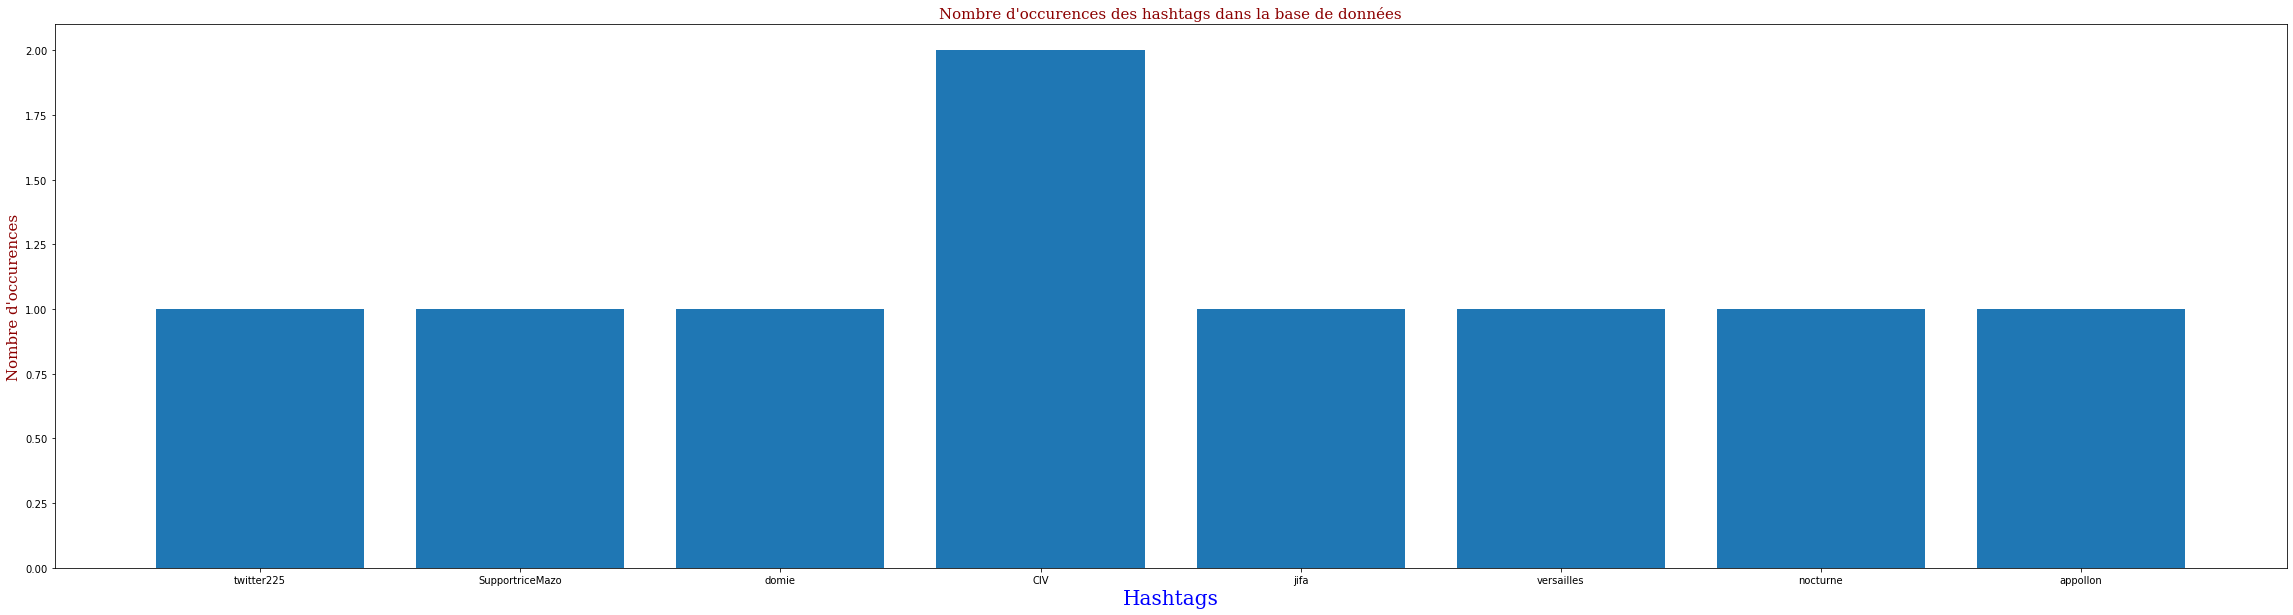

In [86]:
compte = Count_H()

plt.rcParams["figure.figsize"] = [40, 10]
plt.bar(compte.keys(), compte.values())

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.xlabel("Hashtags", fontdict = font1)
plt.ylabel("Nombre d'occurences", fontdict = font2)
plt.title(f"Nombre d'occurences des hashtags dans la base de données", fontdict = font2)

plt.show()

On affiche les Top_K_Hashatags dans la base de données (soit les hashtags qui ressortent le plus dans la base de données) sous la forme d'un histogramme, en prenant K = 3. Néanmoins, l'utilisateur pourrait changer ce paramètre à n'importe quel moment.

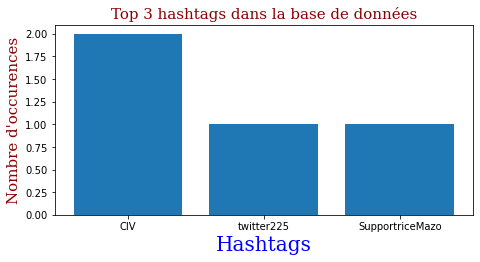

In [88]:
K = 3

Top_K = Top_K_Hashtags(K)
#print(Top_K) to verify elements

compte2 = []
for i in range(len(Top_K)):
    compte2.append(Count_H().get(Top_K[i]))
#print(compte2) to verify elements

x = np.arange(len(Top_K))
plt.bar(x, compte2)
plt.xticks(x, Top_K)
plt.rcParams["figure.figsize"] = [7.50, 3.50] 

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.xlabel("Hashtags", fontdict = font1)
plt.ylabel("Nombre d'occurences", fontdict = font2)
plt.title(f"Top {K} hashtags dans la base de données", fontdict = font2)

plt.show()

On affiche les Top_K_Authors dans la base de données (soit les auteurs qui ressortent le plus dans la base de données, donc ceux qui ont le plus de publications à leur actif) sous la forme d'un histogramme, en prenant K = 3. Néanmoins, l'utilisateur pourrait changer ce paramètre à n'importe quel moment.

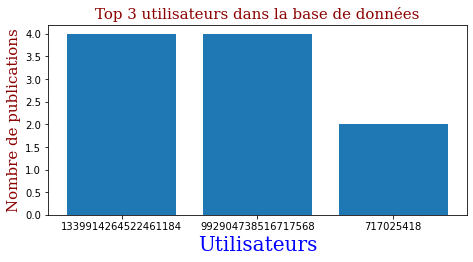

In [89]:
K = 3

Top_K = Top_K_Authors(K)
#print(Top_K) to verify elements

compte2 = []
for i in range(len(Top_K)):
    compte2.append(Count_Authors().get(Top_K[i]))
#print(compte2) to verify elements

x = np.arange(len(Top_K))
plt.bar(x, compte2)
plt.xticks(x, Top_K)
plt.rcParams["figure.figsize"] = [7.50, 3.50] 

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.xlabel("Utilisateurs", fontdict = font1)
plt.ylabel("Nombre de publications", fontdict = font2)
plt.title(f"Top {K} utilisateurs dans la base de données", fontdict = font2)

plt.show()

On affiche les Top_K_At dans la base de données (soit les mentions qui ressortent le plus dans la base de données) sous la forme d'un histogramme, en prenant K = 3. Néanmoins, l'utilisateur pourrait changer ce paramètre à n'importe quel moment.

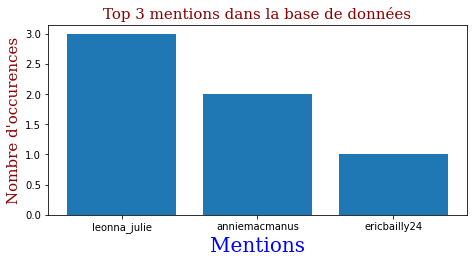

In [90]:
K = 3

Top_K = Top_K_At(K)
#print(Top_K) to verify elements

compte2 = []
for i in range(len(Top_K)):
    compte2.append(Count_A().get(Top_K[i]))
#print(compte2) to verify elements

x = np.arange(len(Top_K))
plt.bar(x, compte2)
plt.xticks(x, Top_K)
plt.rcParams["figure.figsize"] = [7.50, 3.50] 

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.xlabel("Mentions", fontdict = font1)
plt.ylabel("Nombre d'occurences", fontdict = font2)
plt.title(f"Top {K} mentions dans la base de données", fontdict = font2)

plt.show()

On affiche les Top_K_Topics dans la base de données (soit les topics qui ressortent le plus dans la base de données) sous la forme d'un histogramme, en prenant K = 3. Néanmoins, l'utilisateur pourrait changer ce paramètre à n'importe quel moment.
N.B. : On modifie la valeur 'None' représentant les topics indéterminés par 'Indéterminés' afin de renvoyer un histogramme plus joli et plus significatif.

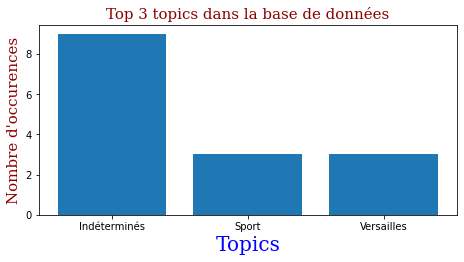

In [91]:
K = 3

Top_K = Top_K_Topics(K)
#print(Top_K)

compte2 = []
for i in range(len(Top_K)):
    compte2.append(Count_T().get(Top_K[i]))
#print(compte2)

for i in range (len(Top_K)):
    if Top_K[i] == None:
        Top_K[i] = 'Indéterminés'
#print(Top_K)

x = np.arange(len(Top_K))
plt.bar(x, compte2)
plt.xticks(x, Top_K)
plt.rcParams["figure.figsize"] = [7.50, 3.50] 

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.xlabel("Topics", fontdict = font1)
plt.ylabel("Nombre d'occurences", fontdict = font2)
plt.title(f"Top {K} topics dans la base de données", fontdict = font2)

plt.show()

La plateforme InPoDa pourrait utiliser la programmation orientée objet pour réaliser une bonne partie des opérations réalisées préalablement, notamment pour encapsuler d'avantage les données. Néanmoins, le sujet indiquant d'utiliser cette manière de programmer si nécessaire et n'en ayant pas ressenti particulièrement le besoin lors de la réalisation de ce projet (en plus de ne pas encore maîtriser convenablement cette manière de programmer) : j'ai pris l'initiative de ne pas le faire. Par ailleurs, je ne voyais pas l'intérêt de créer de nouveaux objets alors que l'énoncé demandait uniquement de réaliser des opérations sur les données.

Voici donc l'ensemble des opérations réalisées par la plateforme de traitements et d'analyses de données InPoDa. On considérera que toutes les opérations d'analyses réalisées constituent un bloc de code compact écrit à la suite de celui qui gère le traitement de données et que par conséquent l'utilisateur et donc l'analyste de données peut déclencher l'ensemble des opérations rapidement et facilement. Néanmoins, certaines fonctions nécessitent tout de même d'être appelées spécifiquement avec un paramètre en particulier afin d'avoir un réel intérêt  (e.g. : get_Authors_By_Hashtags(N), get_Authors_Ated_By_Another_Author(N)). Par ailleurs, le sujet devant être rendu sous la forme d'un Jupyter Notebook, certaines commandes print ont été omises exprès afin de faciliter la lecture du code.

N.B. : Les commentaires ont été écrits en anglais afin de faciliter la réutilisation du code du projet ; notamment pour le poster sur github au besoin. Par ailleurs, comme j'ai écrit de longues phrases explicatives en français pour guider l'avancée du projet ainsi que sa lecture, le code me semblait suffisamment limpide et détaillé.